<a href="https://colab.research.google.com/github/UmeshGayashan/Emotion_Detection_Model/blob/newMethodTensorFlow/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install kaggle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-17 11:29:46            184        377  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           8245        146  1.0              
damirdizdarevic/uefa-euro-2024-players                               UEFA EURO 2024 - Players                          15KB  2024-06-08 18:07:29           1723         37  1.0              
mayankanand2701/tesla-stock-price-dataset         

In [10]:
! kaggle datasets download 'msambare/fer2013'

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
! unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [12]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [13]:
img_array = cv2.imread("test/angry/PrivateTest_10131363.jpg")

In [14]:
img_array.shape

(48, 48, 3)

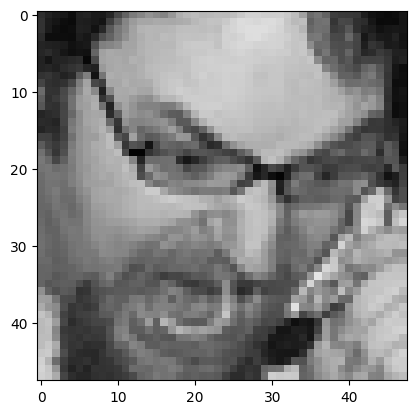

In [15]:
plt.imshow(img_array)

In [16]:
Datadirectory = 'train/'

In [17]:
Classes =['angry','disgust', 'fear', 'happy','neutral','sad','surprise']

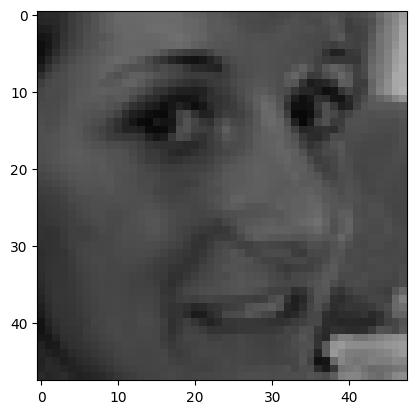

In [18]:
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break

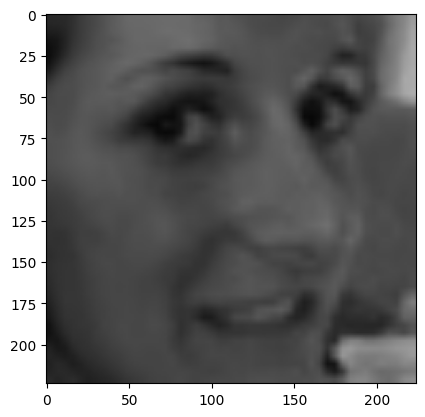

In [19]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [20]:
new_array.shape

(224, 224, 3)

In [21]:
training_Data = []

def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_Data.append([new_array, class_num])
      except Exception as e:
        pass

In [22]:
create_training_Data()

In [23]:
print(len(training_Data))

28709


In [24]:
import random
random.shuffle(training_Data)

In [1]:
X = []
y = []

for features, label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

NameError: name 'training_Data' is not defined

In [26]:
X.shape

(28709, 224, 224, 3)

In [ ]:
X = X/255.0;

In [ ]:
# type(y)

In [ ]:
# Y = np.array(y)

In [ ]:
# Y.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2() # Pre-trained Model

In [ ]:
model.summary()

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [ ]:
final_output

In [ ]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
new_model.fit(X, y, epochs=25, validation_split=0.1)

In [ ]:
new_model.save('my_model_new.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model_new.h5')

In [16]:
IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32

In [17]:
train_data_dir='train/'
validation_data_dir='test/'

In [18]:
train_datagen = ImageDataGenerator(
					rescale=1./255, #gray scale image
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

Found 28709 images belonging to 7 classes.


In [21]:
validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 7178 images belonging to 7 classes.


In [22]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [23]:
#make sure the generator is working and that image and lable are indeed lined up.
img, label = train_generator.__next__() #img : (32,48,48,1) lable: (32,7)

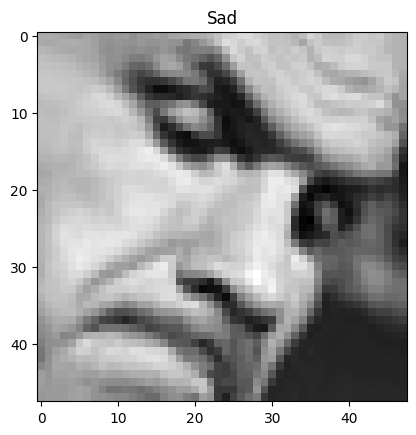

In [25]:
import random
#this is do to check the image is correctly loaded
i=random.randint(0, (img.shape[0])-1) #return an integer number selected element form the spacific range
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [27]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten()) #to get one dense layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax')) #seven classes

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [28]:
train_path = "train/"
test_path = "test/"

In [29]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [30]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [31]:
epochs=50

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size, #897
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size) #224

model.save('emotion_detection_model_100epochs.h5')

Epoch 1/50
897/897 [==============================] - 37s 33ms/step - loss: 1.7777 - accuracy: 0.2655 - val_loss: 1.7020 - val_accuracy: 0.3182
Epoch 2/50
897/897 [==============================] - 29s 32ms/step - loss: 1.6496 - accuracy: 0.3446 - val_loss: 1.4771 - val_accuracy: 0.4295
Epoch 3/50
897/897 [==============================] - 29s 32ms/step - loss: 1.5226 - accuracy: 0.4079 - val_loss: 1.3684 - val_accuracy: 0.4711
Epoch 4/50
897/897 [==============================] - 28s 31ms/step - loss: 1.4298 - accuracy: 0.4454 - val_loss: 1.2666 - val_accuracy: 0.5060
Epoch 5/50
897/897 [==============================] - 30s 33ms/step - loss: 1.3737 - accuracy: 0.4687 - val_loss: 1.2639 - val_accuracy: 0.5162
Epoch 6/50
897/897 [==============================] - 28s 31ms/step - loss: 1.3347 - accuracy: 0.4874 - val_loss: 1.2166 - val_accuracy: 0.5360
Epoch 7/50
897/897 [==============================] - 30s 33ms/step - loss: 1.3124 - accuracy: 0.5008 - val_loss: 1.1866 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


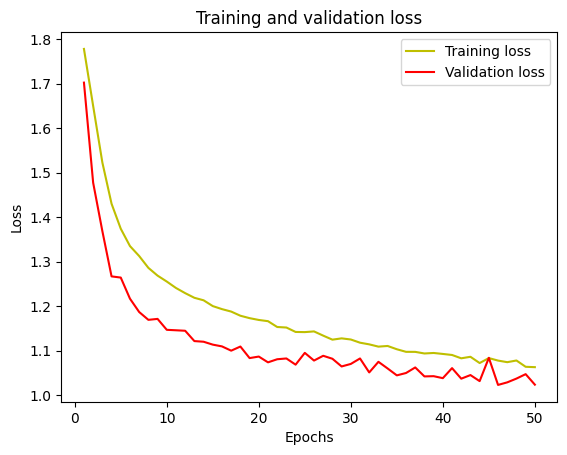

In [32]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

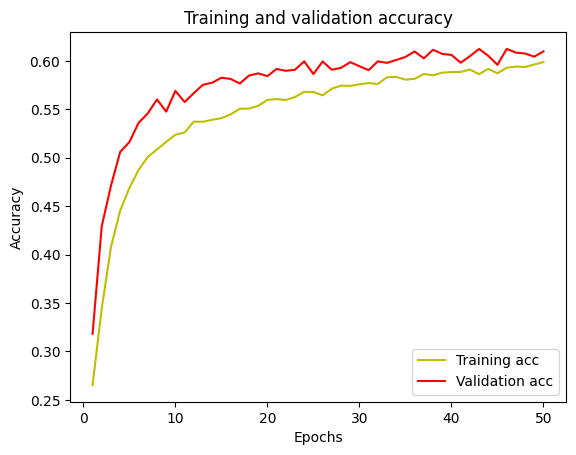

In [34]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
from keras.models import load_model

In [36]:
#Test the model
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

In [37]:
#Generate a batch of images (32 images from the validation dataset)
test_img, test_lbl = validation_generator.__next__() #test imag :(32,48,48,1) tast lbl : (32,7)
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1) #do prediction of all
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

1/1 [==============================] - 0s 112ms/step
Accuracy =  0.65625


In [38]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

<Axes: >

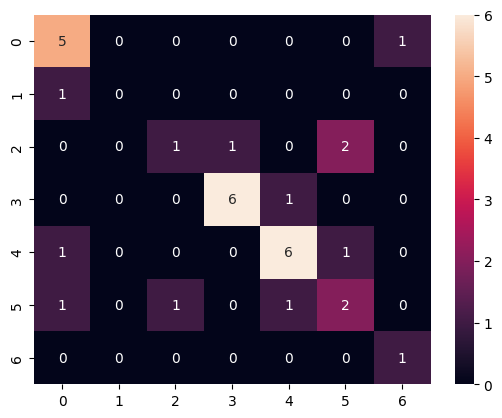

In [39]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

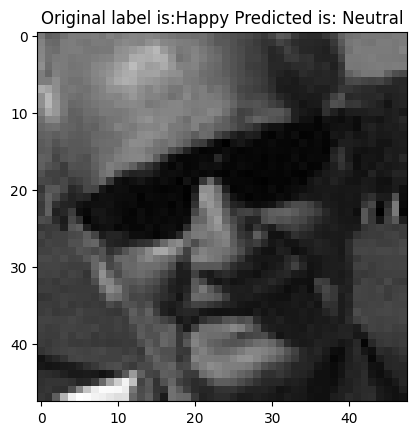

In [40]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()